# Homework 3 Solution
## PHYS 165
### John Evans
### 9/27/18

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random

# magic command to plot in jupyter notebook
%matplotlib inline

# import csv data and format headers
data = pd.read_csv('./Homework3.csv', header=1)
data.columns = ['Reconstructed Mass','Events','Error']

# show data to make sure import went well
pd.set_option('display.max_rows', 20)
print(data)

    Reconstructed Mass     Events     Error
0                 85.0  20.113877  4.484850
1                 85.2  19.489586  4.414701
2                 85.4  17.077990  4.132552
3                 85.6  20.827660  4.563733
4                 85.8  21.537851  4.640889
5                 86.0  22.022638  4.692828
6                 86.2  23.933984  4.892237
7                 86.4  23.154462  4.811908
8                 86.6  26.490029  5.146846
9                 86.8  25.585253  5.058187
..                 ...        ...       ...
51                95.2  26.138151  5.112548
52                95.4  23.006606  4.796520
53                95.6  32.494407  5.700387
54                95.8  15.978899  3.997361
55                96.0  19.221939  4.384283
56                96.2  22.563486  4.750104
57                96.4  23.081548  4.804326
58                96.6  27.246494  5.219817
59                96.8  15.305178  3.912183
60                97.0  31.366800  5.600607

[61 rows x 3 columns]


### Part 1

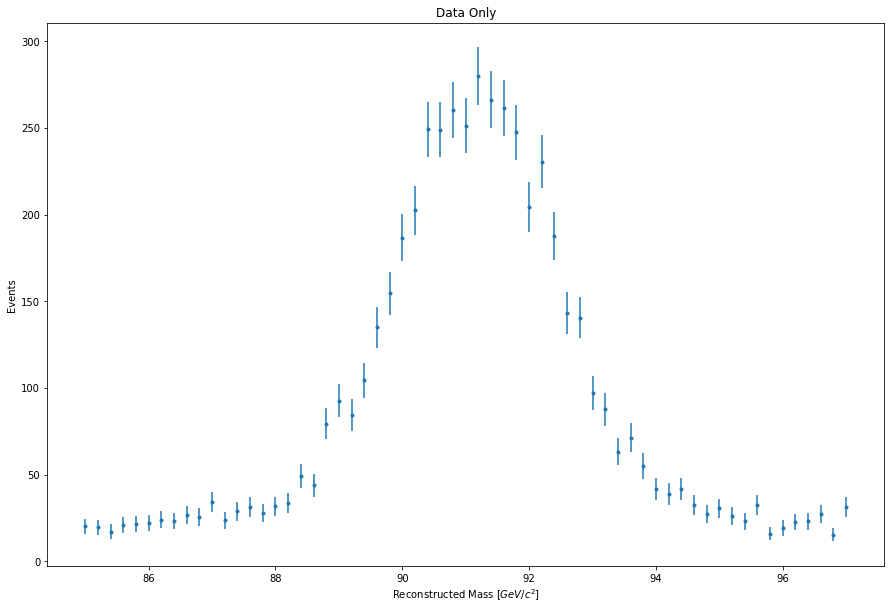

In [2]:
# plot data with error bars
plt.figure(figsize=(15, 10))
plt.errorbar(data['Reconstructed Mass'], data['Events'], yerr=data['Error'], linestyle='', marker='.')
plt.xlabel(r'Reconstructed Mass [$GeV/c^2$]')
plt.ylabel('Events')
plt.title('Data Only')
plt.show()

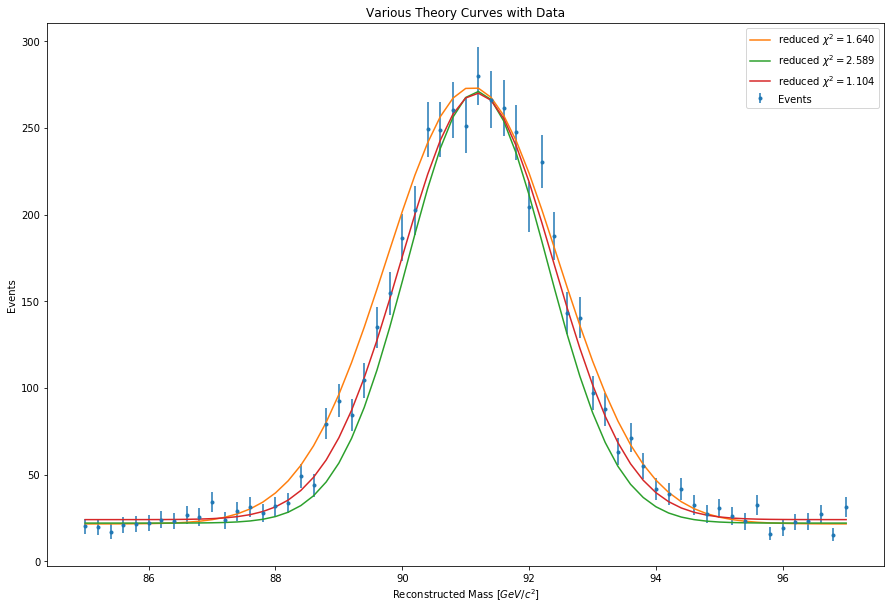

      n_back    a     m_0  sigma  Reduced Chi^2
1901    21.5  252  91.105   1.35       1.639649
2622    22.0  249  91.185   1.10       2.589102
6272    24.0  246  91.180   1.20       1.103663


In [3]:
def count_theory(m, n_back, a, m_0, sigma):
    '''
    function to model count based on reconstructed mass and fitting parameters
    from assignment: Theory curve = N_back + A * exp(-(mass-M_0)**2/(2*sigma**2))
    N_back = vertical shift
    M_0 = horizontal shift
    A = vertical scale factor
    sigma = HWHM
    '''
    return n_back + a * np.exp(-(m-m_0)**2/(2*sigma**2))

def reduced_chi2(data, theory, sigma, v):
    '''
    function to calculate reduced Chi^2 of data
    '''
    chi2 = ((data - theory)/sigma)**2
    return sum(chi2)/v

# try some different parameters
# starting parameters determined by looking at data plot:
# n_backs is the vertical shift, so roughly 20
# sigma is determined from HWHM, so roughly 1.5
# m_0 is the horizontal shift, so roughly 91
# A is the scale factor, so roughly 250
n_backs = np.arange(21, 25, .5)
sigmas  = np.arange(1.1, 1.4, .05)
m_0s    = np.arange(91.1,91.2,.005)
As      = np.arange(245,253)

# build every combination of parameters
params = list(itertools.product(n_backs,As,m_0s,sigmas))

chi2s = []

# plot data
plt.figure(figsize=(15, 10))
plt.errorbar(data['Reconstructed Mass'], data['Events'], yerr=data['Error'], linestyle='', marker='.')

# randomly choose some parameter indicies to plot
permutation_indicies = range(len(params))
plot_indicies = random.sample(permutation_indicies,3)

# degrees of freedom equal to number of data points minus number of fitting parameters
v = len(data)-4

# get Chi^2 for all combinations of parameters and plot some of them
for i,(n_back,a,m_0,sigma) in enumerate(params):
    # calculate y values based on defined theory
    y = count_theory(data['Reconstructed Mass'], n_back, a, m_0, sigma)
    # calculate chi^2 for these parameters
    chi2 = reduced_chi2(data['Events'], y, data['Error'], v)
    # save Chi^2 and parameters
    chi2s.append((n_back,a,m_0,sigma,chi2))
    # if the index is one of the chosen plotting indicies, plot the curve
    if i in plot_indicies:
        plt.plot(data['Reconstructed Mass'],y,label=r'reduced $\chi^2={:.3f}$'.format(chi2))

# format plot
plt.xlabel(r'Reconstructed Mass [$GeV/c^2$]')
plt.ylabel('Events')
plt.title('Various Theory Curves with Data')
plt.legend()
plt.show()

# print Chi^2 and parameters for each curve plotted
chi2_df = pd.DataFrame(chi2s, columns = ['n_back','a','m_0','sigma','Reduced Chi^2'])
print(chi2_df.iloc[plot_indicies])

### Part 2

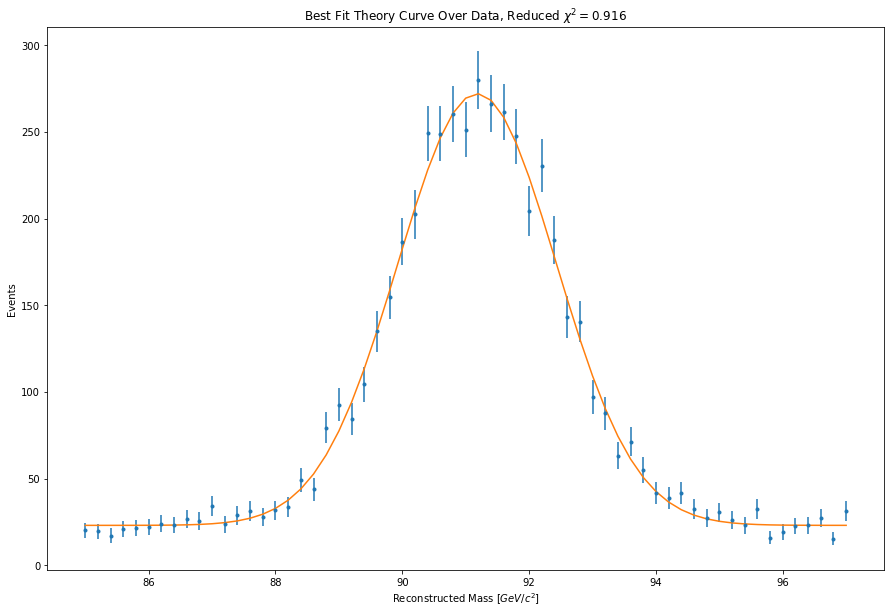

      n_back    a    m_0  sigma  Reduced Chi^2
4635    23.0  249  91.18   1.25        0.91643


In [4]:
# find best fit from varied parameter choices by finding the index of the minimum chi^2
best_chi2, best_index = min((val, i) for (i,val) in enumerate(chi2_df['Reduced Chi^2']))

# plot best fit curve with data and format
plt.figure(figsize=(15, 10))
plt.errorbar(data['Reconstructed Mass'], data['Events'], yerr=data['Error'], linestyle='', marker='.')
plt.plot(data['Reconstructed Mass'], count_theory(data['Reconstructed Mass'],*chi2s[best_index][:-1]))
plt.title(r'Best Fit Theory Curve Over Data, Reduced $\chi^2={:.3f}$'.format(best_chi2))
plt.xlabel(r'Reconstructed Mass [$GeV/c^2$]')
plt.ylabel('Events')
plt.show()

# print parameters that gave best fit
print(chi2_df.iloc[[best_index]])